First 5 data points:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 0.9556


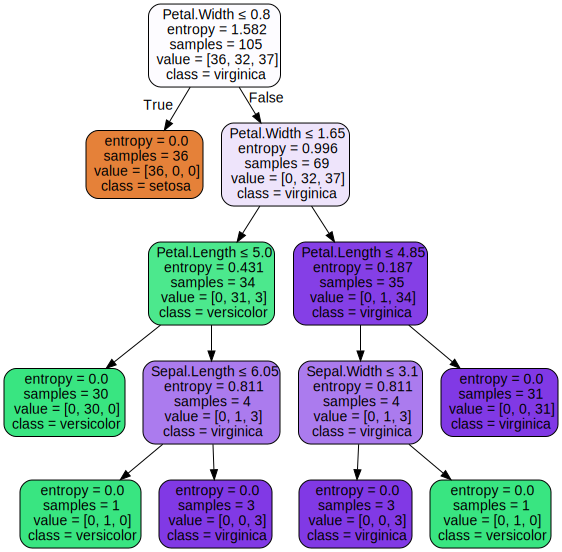


Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz
from IPython.display import display

# Load the Iris dataset
data = pd.read_csv("iris.csv")

# Preview the first few data points
print("First 5 data points:")
print(data.head())

# Separate features and target variable
features = data[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
target = data["Species"]

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=1
)

# Train a decision tree classifier with entropy criterion
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")  # Format accuracy with 4 decimal places

# Generate a clear decision tree visualization and display it inline
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=features.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
display(graph)  # Display the graph inline in Jupyter/Colab

# Analyze confusion matrix to understand classification performance
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)
